## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import urllib
import csv
import glob
import numpy as np
import matplotlib.patches as mpatches



#
tv_movies_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    
tv_movies_df.head()


#combine_df
tv_movies_df.head()
tv_movies_df1 =tv_movies_df.drop('Unnamed: 0',axis=1)
tv_movies_df1.head()

#age_sets = tv_movies_df1["Age"].unique()
#age_sets
age_sets2 = ['all', '7+', '13+', '16+', '18+']
print(age_sets2)
tv_movies_df1.head()
tv_movies_df1.head()

['all', '7+', '13+', '16+', '18+']


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [5]:
tv_movies_df1["IMDb"] = tv_movies_df1["IMDb"].astype(float)

test_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=0)  ] 
                             
                #(tv_movies_df1["IMDb"] !="NaN")]
                                      
                                     
htest_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=8)  ] 
                
                             

htest_df.describe
test_df.describe

<bound method NDFrame.describe of                                 Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+   8.8             87%   
1                          The Matrix  1999  18+   8.7             87%   
2              Avengers: Infinity War  2018  13+   8.5             84%   
3                  Back to the Future  1985   7+   8.5             96%   
4      The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...                               ...   ...  ...   ...             ...   
16738    Whispers: An Elephant's Tale  2000  all   5.0             NaN   
16739       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740                  The Poof Point  2001   7+   4.7             NaN   
16741           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742              Man Among Cheetahs  2017  NaN   6.6             NaN   

      Netflix Hulu Prime Video Disney+ Type                       Directors  

In [6]:
test2_df = test_df.loc[(test_df["Netflix"] == "1")]
test3_df = test_df.loc[(test_df["Hulu"] == "1")]
test4_df = test_df.loc[(test_df["Prime Video"] == "1")]
test5_df = test_df.loc[(test_df["Disney+"] == "1")]



htest2_df = htest_df.loc[(htest_df["Netflix"] == "1")]
htest3_df = htest_df.loc[(htest_df["Hulu"] == "1")]
htest4_df = htest_df.loc[(htest_df["Prime Video"] == "1")]
htest5_df = htest_df.loc[(htest_df["Disney+"] == "1")]







print(test2_df)
print(htest2_df)


                                                  Title  Year  Age  IMDb  \
0                                             Inception  2010  13+   8.8   
1                                            The Matrix  1999  18+   8.7   
2                                Avengers: Infinity War  2018  13+   8.5   
3                                    Back to the Future  1985   7+   8.5   
4                        The Good, the Bad and the Ugly  1966  18+   8.8   
...                                                 ...   ...  ...   ...   
3459                                   It's Okay, Buddy  2017  NaN   3.1   
3460                                  Behind 'The Cove'  2015  NaN   3.7   
3461  Edmilson Filho: Notas, Comedy about Relationships  2018  NaN   5.8   
3462                                           Hattrick  2007   7+   4.2   
3468                                                EMI  2008  NaN   4.3   

     Rotten Tomatoes Netflix Hulu Prime Video Disney+ Type  \
0                87%     

In [8]:
s2 = test2_df.groupby("Age")["Netflix"].count().to_frame(name = "nf-age").reset_index()
s3 = test3_df.groupby("Age")["Hulu"].count().to_frame(name = "hu-age").reset_index()
s4 = test4_df.groupby("Age")["Prime Video"].count().to_frame(name = "pv-age").reset_index()
s5 = test5_df.groupby("Age")["Disney+"].count().to_frame(name = "di-age").reset_index()

s2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

s2.sort_values(by = "Age", inplace = True)
s3.sort_values(by = "Age", inplace = True)
s4.sort_values(by = "Age", inplace = True)
s5.sort_values(by = "Age", inplace = True)

print(s2)
print(s3)
print(s4)
print(s5)





hs2 = htest2_df.groupby("Age")["Netflix"].count().to_frame(name = "hnf-age").reset_index()
hs3 = htest3_df.groupby("Age")["Hulu"].count().to_frame(name = "hhu-age").reset_index()
hs4 = htest4_df.groupby("Age")["Prime Video"].count().to_frame(name = "hpv-age").reset_index()
hs5 = htest5_df.groupby("Age")["Disney+"].count().to_frame(name = "hdi-age").reset_index()

hs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

hs2.sort_values(by = "Age", inplace = True)
hs3.sort_values(by = "Age", inplace = True)
hs4.sort_values(by = "Age", inplace = True)
hs5.sort_values(by = "Age", inplace = True)

hs5 = hs5.append({"Age":16,"hdi-age":0},ignore_index=True)
hs5 = hs5.append({"Age":18,"hdi-age":0},ignore_index=True)
hs5["Age"] = hs5["Age"].astype(int)



print(hs2)
print(hs3)
print(hs4)
print(hs5)







ms2 = test2_df.groupby("Age")["IMDb"].mean().to_frame(name = "mnf-age").reset_index()
ms3 = test3_df.groupby("Age")["IMDb"].mean().to_frame(name = "mhu-age").reset_index()
ms4 = test4_df.groupby("Age")["IMDb"].mean().to_frame(name = "mpv-age").reset_index()
ms5 = test5_df.groupby("Age")["IMDb"].mean().to_frame(name = "mdi-age").reset_index()

ms2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

ms2.sort_values(by = "Age", inplace = True)
ms3.sort_values(by = "Age", inplace = True)
ms4.sort_values(by = "Age", inplace = True)
ms5.sort_values(by = "Age", inplace = True)

print(ms2)
print(ms3)
print(ms4)
print(ms5)




   Age  nf-age
4    3     130
3    7     321
0   13     381
1   16      89
2   18     752
   Age  hu-age
4    3      52
3    7     109
0   13     118
1   16      17
2   18     289
   Age  pv-age
4    3     398
3    7     912
0   13     808
1   16     225
2   18    2607
   Age  di-age
4    3     277
3    7     179
0   13      40
1   16       1
2   18       3
   Age  hnf-age
4    3        9
3    7       19
0   13       18
1   16        2
2   18       37
   Age  hhu-age
4    3        2
3    7        5
0   13        8
1   16        1
2   18       10
   Age  hpv-age
4    3       24
3    7       33
0   13       34
1   16        6
2   18       32
   Age  hdi-age
0    3       14
1    7       12
2   13        6
3   16        0
4   18        0
   Age   mnf-age
4    3  6.276923
3    7  6.203738
0   13  6.345669
1   16  6.323596
2   18  6.289628
   Age   mhu-age
4    3  5.909615
3    7  6.285321
0   13  6.430508
1   16  5.411765
2   18  6.176125
   Age   mpv-age
4    3  6.073367
3    7  5.948684
0

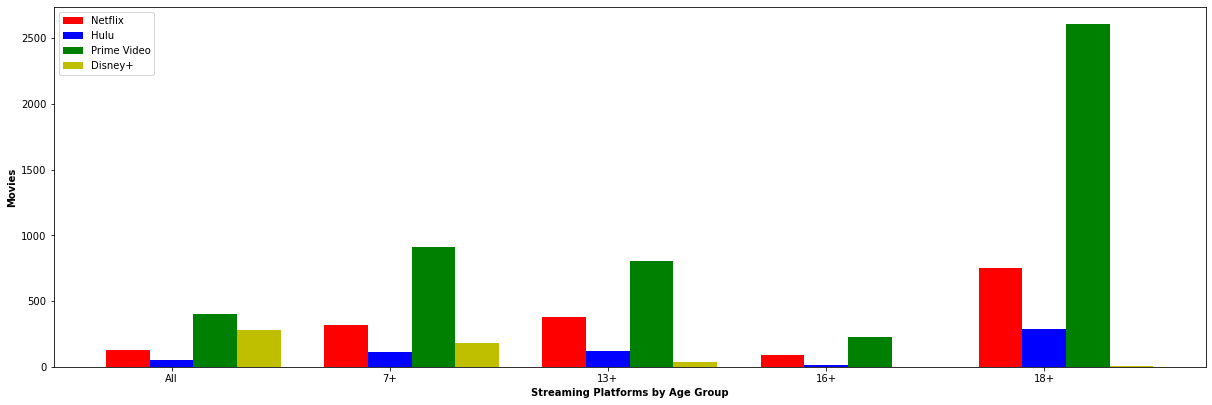

<Figure size 432x288 with 0 Axes>

In [9]:
#movie count by age group

fig = plt.figure(figsize = (16,5))

import matplotlib.patches as mpatches

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, s2["nf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, s3["hu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, s4["pv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, s5["di-age"], color = 'y', width = 0.2, label = "Disney+")


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies', fontweight ='bold')
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+', '13+', '16+', '18+']) 


plt.legend()
                    
plt.show()

plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service.png')


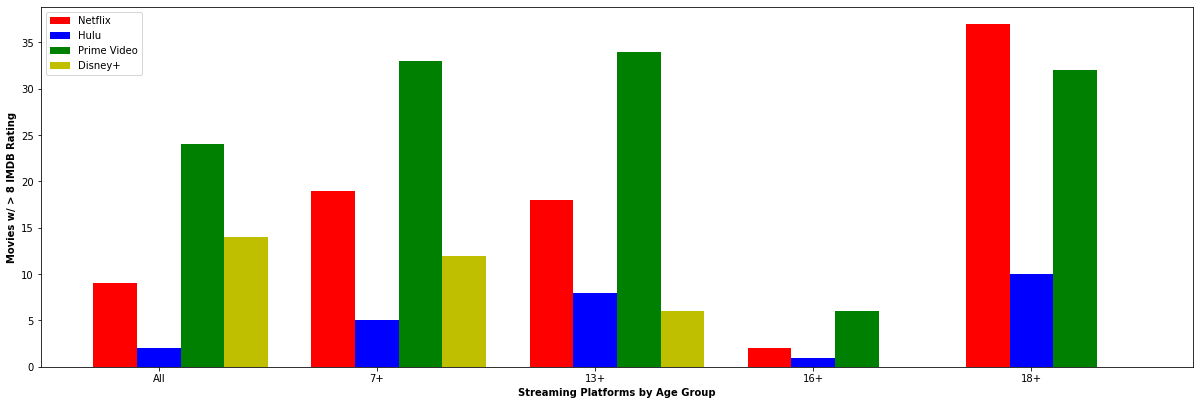

In [11]:
#IMDB greater than 8 by age group

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, hs2["hnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, hs3["hhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, hs4["hpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, hs5["hdi-age"], color = 'y', width = 0.2, label = "Disney+")

plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies w/ > 8 IMDB Rating', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['All', '7+', '13+', '16+', '18+']) 

plt.legend()

plt.savefig(r'../Final_Datasets/Age Group - Movies per Streaming Service with high IMDb score.png')

plt.show()

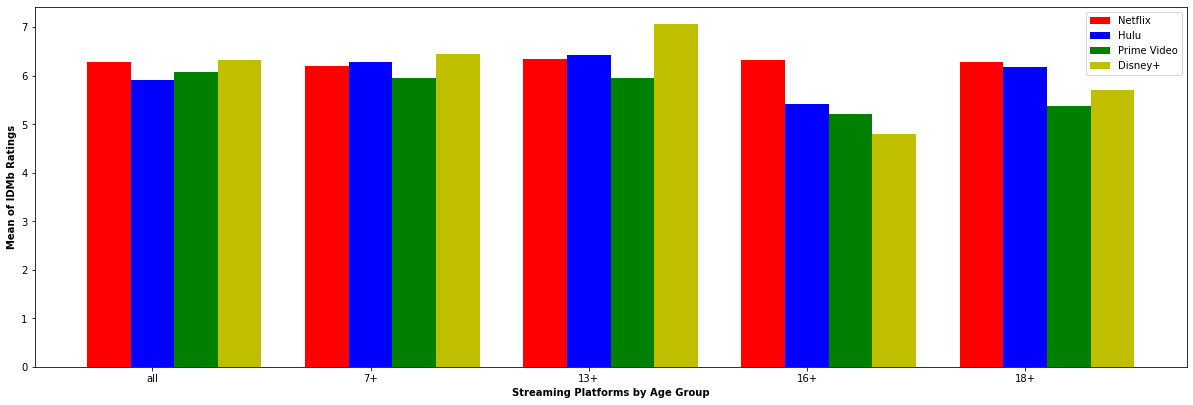

In [12]:

#IMDB mean for each age group

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, ms2["mnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, ms3["mhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, ms4["mpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, ms5["mdi-age"], color = 'y', width = 0.2, label = "Disney+")



plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Mean of IDMb Ratings', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 

plt.legend()



                   
plt.show()

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

## Correlation and Regression